# **Jim Gallagher & Ed Oughton Image Processing Script Develpoed for RGB, TIR, and RGB-TIR Blended ML Object Detection Models** 

![GMU](https://imgur.com/Uv876l3.png)

### Code developed from Dr. Wolf's Image Processing Class


Filters used

1. Flip
2. Blur
3. Flip+Blur
4. SobelX
5. SobelY
6. SobelXY
7. Vertical Edges
8. Horizontal Edges
9. Difference of Gaussians (DoG)
10. Alpha
11. Absolute Value of Alpha
12. Mean Threshold
13. Gaussian Threshold

## 1. Installing Dependencies

In [22]:
#install dependencies

%matplotlib inline
import pandas as pd
import sys
sys.setrecursionlimit(10000)
import os
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv2
import imageio
import scipy.ndimage as nd
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from os import listdir
from numpy import asarray
from numpy import savez_compressed
from matplotlib import pyplot
from matplotlib.image import imread
from google.colab.patches import cv2_imshow
from skimage import io
from PIL import Image 
from skimage import data, color
import scipy.fftpack as ft
from google.colab import drive

### 1.1 Mounting Google Drive

This step will connect your Google Colab notebook to your Google Drive

In [23]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 1.2 Set File Paths in Google Drive

This is where you define the paths where our data is located and where to write the final output.

In [24]:
#person_rgb = '/content/drive/MyDrive/rgb_tir_ground_results/person/rgb/'
#person_tir = '/content/drive/MyDrive/rgb_tir_ground_results/person/tir/'
#person_fuse = '/content/drive/MyDrive/rgb_tir_ground_results/person/fuse/'

#car_rgb = '/content/drive/MyDrive/rgb_tir_ground_results/car/rgb/'
#car_tir = '/content/drive/MyDrive/rgb_tir_ground_results/car/tir/'
#car_fuse = '/content/drive/MyDrive/rgb_tir_ground_results/car/fuse/'

truck = '/content/drive/MyDrive/gallagher_oughton_project_helios/images/air_images/original_images/truck_original_images/all/'
#truck_tir = '/content/drive/MyDrive/rgb_tir_ground_results/truck/tir/'
#truck_fuse = '/content/drive/MyDrive/rgb_tir_ground_results/truck/fuse/'

#results_person_rgb = '/content/drive/MyDrive/rgb_tir_ground_results/results_person/rgb/'
#results_person_tir = '/content/drive/MyDrive/rgb_tir_ground_results/results_person/tir/'
#results_person_fuse = '/content/drive/MyDrive/rgb_tir_ground_results/results_person/fuse/'

#results_car_rgb = '/content/drive/MyDrive/rgb_tir_ground_results/results_car/rgb/'
#results_car_tir = '/content/drive/MyDrive/rgb_tir_ground_results/results_car/tir/'
#results_car_fuse = '/content/drive/MyDrive/rgb_tir_ground_results/results_car/fuse/'

results_truck = '/content/drive/MyDrive/gallagher_oughton_project_helios/images/air_images/original_images/truck_original_images/truck_results/'
#results_truck_tir = '/content/drive/MyDrive/rgb_tir_ground_results/results_truck/tir/'
#results_truck_fuse = '/content/drive/MyDrive/rgb_tir_ground_results/results_truck/fuse/'

lists = os.listdir(truck)
lists

['0.jpg']

Below is the difference of Gaussian Filter Paramaters. DO NOT EDIT THIS.

In [25]:
def DoGFilter(amg, sigma1, sigma2):
    b1 = nd.gaussian_filter(amg, sigma1)
    b2 = nd.gaussian_filter(amg, sigma2)
    answ = b1 - b2
    return answ

### 2. Image Processing Script

The below script is the image processing script that will read and save images from your google drive. To turn-off a filter place the # symbol next to the filter's script that you want to turn-off. To turn a filter on remove the # symbol. Make sure to change the destination folder wherever you see cv2.imwrite in the script.   

In [26]:
lists = os.listdir(truck) #Where to read files from
files = len(lists) #Count the number of files and return it as interger to be used in the loop
for i in range(files):
    try:
        image = imageio.imread(truck+str(i)+'.jpg')
        
        #flipped, blurred, flipped+blurred

        flipped_images = cv2.flip(image, 1);
        blurred_images =  np.hstack([cv2.GaussianBlur(image, (29, 29), 0)])
        flipped_blurred_images = np.hstack([cv2.GaussianBlur(flipped_images, (39, 39), 0)])
        cv2.imwrite(results_truck+str(i)+'truck.jpg',cv2.cvtColor(image, cv2.COLOR_RGB2BGR));
        cv2.imwrite(results_truck+str(i)+'truck_flipped_images.jpg',cv2.cvtColor(flipped_images, cv2.COLOR_RGB2BGR));
        cv2.imwrite(results_truck+str(i)+'truck_blurred_images.jpg',cv2.cvtColor(blurred_images, cv2.COLOR_RGB2BGR));
        cv2.imwrite(results_truck+str(i)+'truck_flipped_blurred.jpg',cv2.cvtColor(flipped_blurred_images, cv2.COLOR_RGB2BGR));
        
        #sobelxy filter
        image = imageio.imread(truck+str(i)+'.jpg')
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        sobelX = cv2.Sobel(image, cv2.CV_64F, 1, 0)
        sobelY = cv2.Sobel(image, cv2.CV_64F, 0, 1)
        sobelX = np.uint8(np.absolute(sobelX))
        sobelY = np.uint8(np.absolute(sobelY))
        sobelCombined = cv2.bitwise_or(sobelX, sobelY)
        cv2.imwrite(results_truck+str(i)+'truck_sobel_xy.jpg',cv2.cvtColor(sobelCombined, cv2.COLOR_RGB2BGR));
       
       #DoG filter
        amg = imageio.imread(truck+str(i)+'.jpg', as_gray=True).astype(np.uint8)
        bmg = DoGFilter(amg, 2, 4)
        cv2.imwrite(results_truck+str(i)+'truck_dog.jpg',cv2.cvtColor(bmg, cv2.COLOR_RGB2BGR));

        #Gaussian thresholding filter
        image = imageio.imread(truck+str(i)+'.jpg')
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        blurred = cv2.GaussianBlur(image, (5, 5), 0)
        thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 15, 3)
        cv2.imwrite(results_truck+str(i)+'truck_gauss_thresh.jpg',cv2.cvtColor(thresh, cv2.COLOR_RGB2BGR));
        
    except:
        pass

### 3. Image Processing Preview Windows

This is where you can preview what your images will look like with processing and filtering. Based off these results you can choose what filters to use in the above image processing tool.

Change the image filepath in the img1, img2 and img3 lines of the code for the images that you want to see processed.

#### Load your test images below

Text(0.5, 1.0, 'TIR truck')

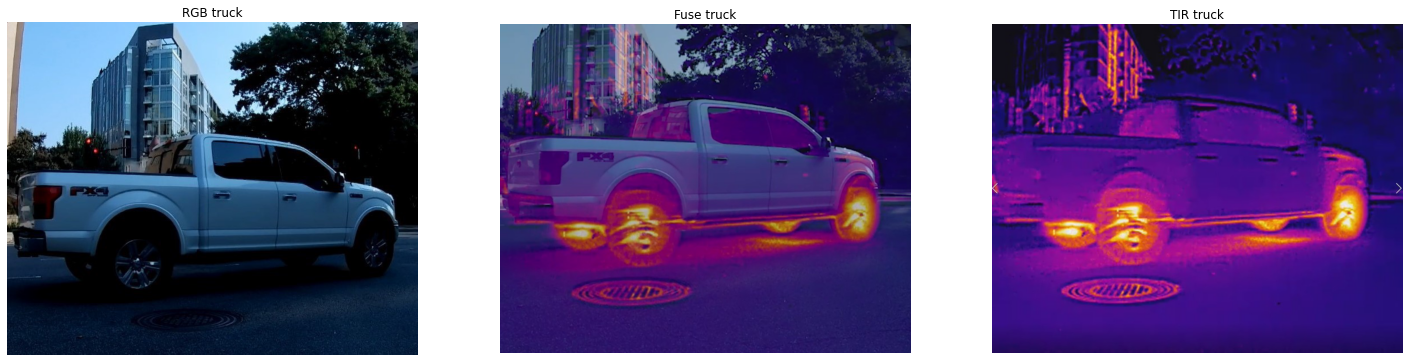

In [ ]:
fig = plt.figure(figsize=(25, 20))
  
# setting values to rows and column variables
rows = 1
columns = 3

#Upload Images to Google Drive (look in the upper left and click the folder icon).
#Only change image file names in this cell. 

fig.add_subplot(rows, columns, 1)
img1 = truck_rgb + '1.jpg'
image = imageio.imread(img1)
plt.imshow(image)
plt.axis('off')
plt.title('RGB truck')

fig.add_subplot(rows, columns, 2)
img2 = truck_fuse + '1.jpg'
image = imageio.imread(img2)
plt.imshow(image)
plt.axis('off')
plt.title('Fuse truck')

fig.add_subplot(rows, columns, 3)
img3 = truck_tir + '1.jpg'
image = imageio.imread(img3)
plt.imshow(image)
plt.axis('off')
plt.title('TIR truck')

### 3.1 Flip, Blur, Flip & Blur Filters

(-0.5, 948.5, 760.5, -0.5)

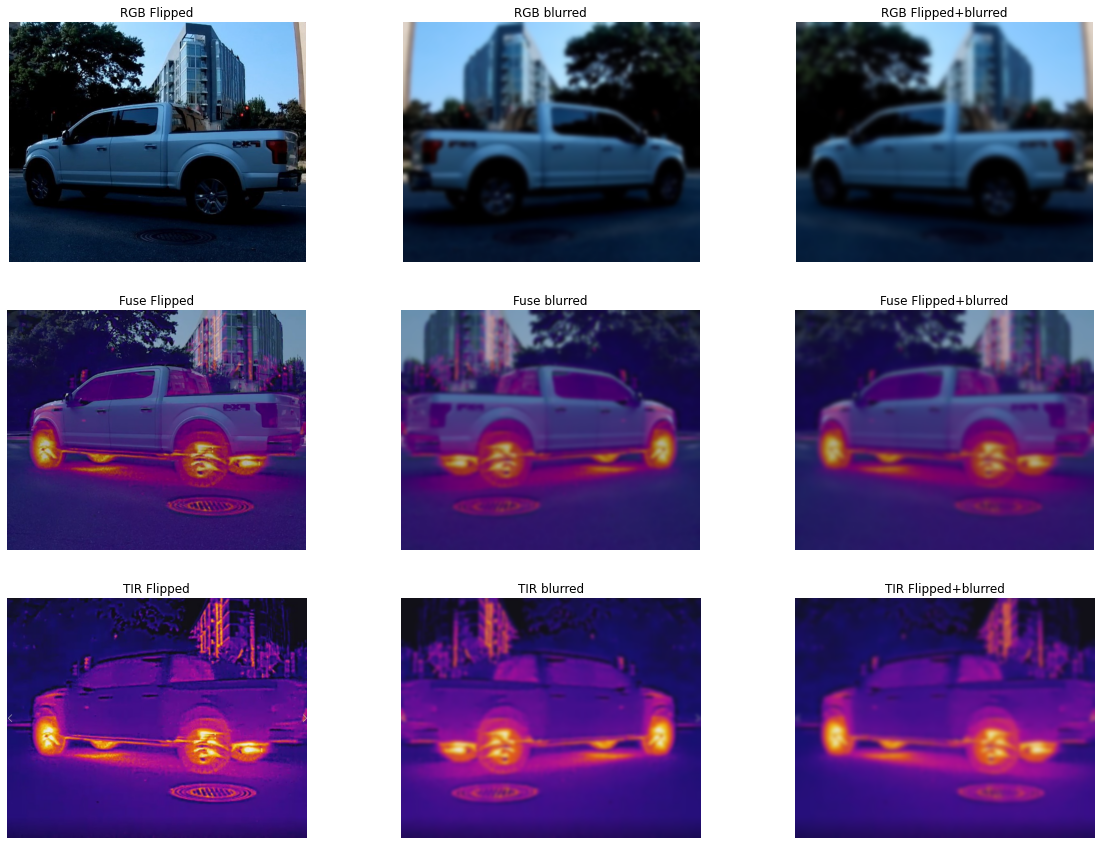

In [ ]:
fig = plt.figure(figsize=(20, 15))
  
# setting values to rows and column variables
rows = 3
columns = 3

#RGB Flip, Blur and Flip_Blur

dat = imageio.imread(img1, as_gray=False).astype(np.uint8)

flipped_images = cv2.flip(dat, 1);
blurred_images =  np.hstack([cv2.GaussianBlur(dat, (29, 29), 0)])
flipped_blurred_images = np.hstack([cv2.GaussianBlur(flipped_images, (39, 39), 0)])

fig.add_subplot(rows, columns, 1)
plt.title('RGB Flipped')
plt.imshow(flipped_images)
plt.axis('off')

fig.add_subplot(rows, columns, 2)
plt.title('RGB blurred')
plt.imshow(blurred_images)
plt.axis('off')

fig.add_subplot(rows, columns, 3)
plt.title('RGB Flipped+blurred')
plt.imshow(flipped_blurred_images)
plt.axis('off')

#Fuse Flip, Blur and Flip_Blur

dat1 = imageio.imread(img2, as_gray=False).astype(np.uint8)

flipped_images1 = cv2.flip(dat1, 1);
blurred_images1 =  np.hstack([cv2.GaussianBlur(dat1, (29, 29), 0)])
flipped_blurred_images1 = np.hstack([cv2.GaussianBlur(flipped_images1, (39, 39), 0)])

fig.add_subplot(rows, columns, 4)
plt.title('Fuse Flipped')
plt.imshow(flipped_images1)
plt.axis('off')

fig.add_subplot(rows, columns, 5)
plt.title('Fuse blurred')
plt.imshow(blurred_images1)
plt.axis('off')

fig.add_subplot(rows, columns, 6)
plt.title('Fuse Flipped+blurred')
plt.imshow(flipped_blurred_images1)
plt.axis('off')

#TIR Flip, Blur and Flip_Blur

dat2 = imageio.imread(img3, as_gray=False).astype(np.uint8)

flipped_images2 = cv2.flip(dat2, 1);
blurred_images2 =  np.hstack([cv2.GaussianBlur(dat2, (29, 29), 0)])
flipped_blurred_images2 = np.hstack([cv2.GaussianBlur(flipped_images2, (39, 39), 0)])

fig.add_subplot(rows, columns, 7)
plt.title('TIR Flipped')
plt.imshow(flipped_images2)
plt.axis('off')

fig.add_subplot(rows, columns, 8)
plt.title('TIR blurred')
plt.imshow(blurred_images2)
plt.axis('off')

fig.add_subplot(rows, columns, 9)
plt.title('TIR Flipped+blurred')
plt.imshow(flipped_blurred_images2)
plt.axis('off')

### 3.2 SobelXY Filter

(-0.5, 948.5, 760.5, -0.5)

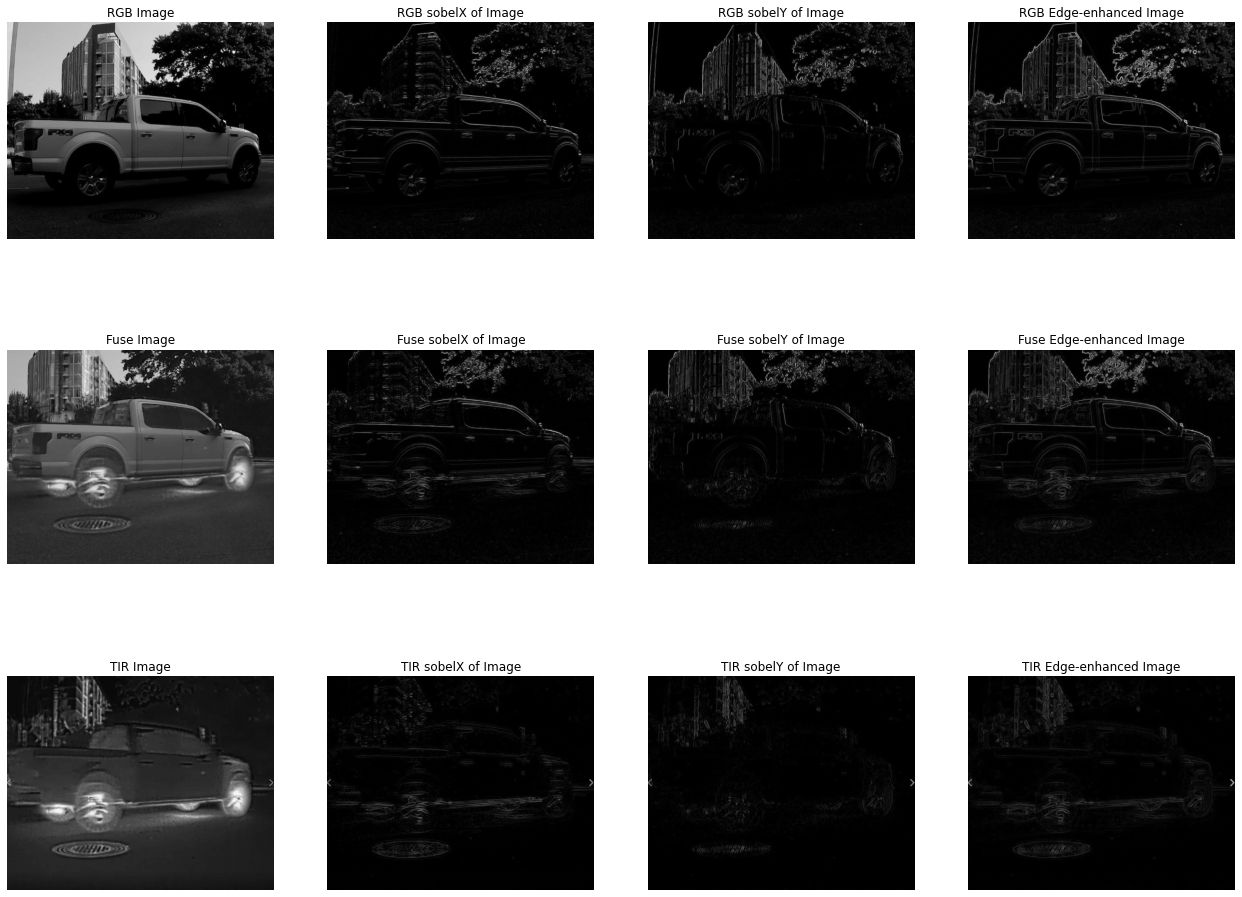

In [ ]:
fig = plt.figure(figsize=(22, 17))
  
# setting values to rows and column variables
rows = 3
columns = 4

#RGB SobelXY

data = imageio.imread(img1, as_gray=True).astype(np.uint8)

fig.add_subplot(rows, columns, 1)
plt.title('RGB Image')
plt.imshow(data, cmap='gray')
plt.axis('off')

fig.add_subplot(rows, columns, 2)
sobelX = nd.sobel(data+0.,axis=0)
plt.title('RGB sobelX of Image')
plt.imshow(abs(sobelX), cmap='gray')
plt.axis('off')

fig.add_subplot(rows, columns, 3)
sobelY = nd.sobel(data+0.,axis=1)
plt.title('RGB sobelY of Image')
plt.imshow(abs(sobelY), cmap='gray')
plt.axis('off')

fig.add_subplot(rows, columns, 4)
edj = abs(sobelX) + abs(sobelY)
plt.title('RGB Edge-enhanced Image')
plt.imshow(edj, cmap='gray')
plt.axis('off')


#Fuse SobelXY

data1 = imageio.imread(img2, as_gray=True).astype(np.uint8)

fig.add_subplot(rows, columns, 5)
plt.title('Fuse Image')
plt.imshow(data1, cmap='gray')
plt.axis('off')

fig.add_subplot(rows, columns, 6)
sobelX = nd.sobel(data1+0.,axis=0)
plt.title('Fuse sobelX of Image')
plt.imshow(abs(sobelX), cmap='gray')
plt.axis('off')

fig.add_subplot(rows, columns, 7)
sobelY = nd.sobel(data1+0.,axis=1)
plt.title('Fuse sobelY of Image')
plt.imshow(abs(sobelY), cmap='gray')
plt.axis('off')

fig.add_subplot(rows, columns, 8)
edj = abs(sobelX) + abs(sobelY)
plt.title('Fuse Edge-enhanced Image')
plt.imshow(edj, cmap='gray')
plt.axis('off')


#TIR SobelXY

data2 = imageio.imread(img3, as_gray=True).astype(np.uint8)

fig.add_subplot(rows, columns, 9)
plt.title('TIR Image')
plt.imshow(data2, cmap='gray')
plt.axis('off')


fig.add_subplot(rows, columns, 10)
sobelX = nd.sobel(data2+0.,axis=0)
plt.title('TIR sobelX of Image')
plt.imshow(abs(sobelX), cmap='gray')
plt.axis('off')


fig.add_subplot(rows, columns, 11)
sobelY = nd.sobel(data2+0.,axis=1)
plt.title('TIR sobelY of Image')
plt.imshow(abs(sobelY), cmap='gray')
plt.axis('off')


fig.add_subplot(rows, columns, 12)
edj = abs(sobelX) + abs(sobelY)
plt.title('TIR Edge-enhanced Image')
plt.imshow(edj, cmap='gray')
plt.axis('off')



### 3.3 Detecting Horizontal and Vertical Edges

(-0.5, 948.5, 760.5, -0.5)

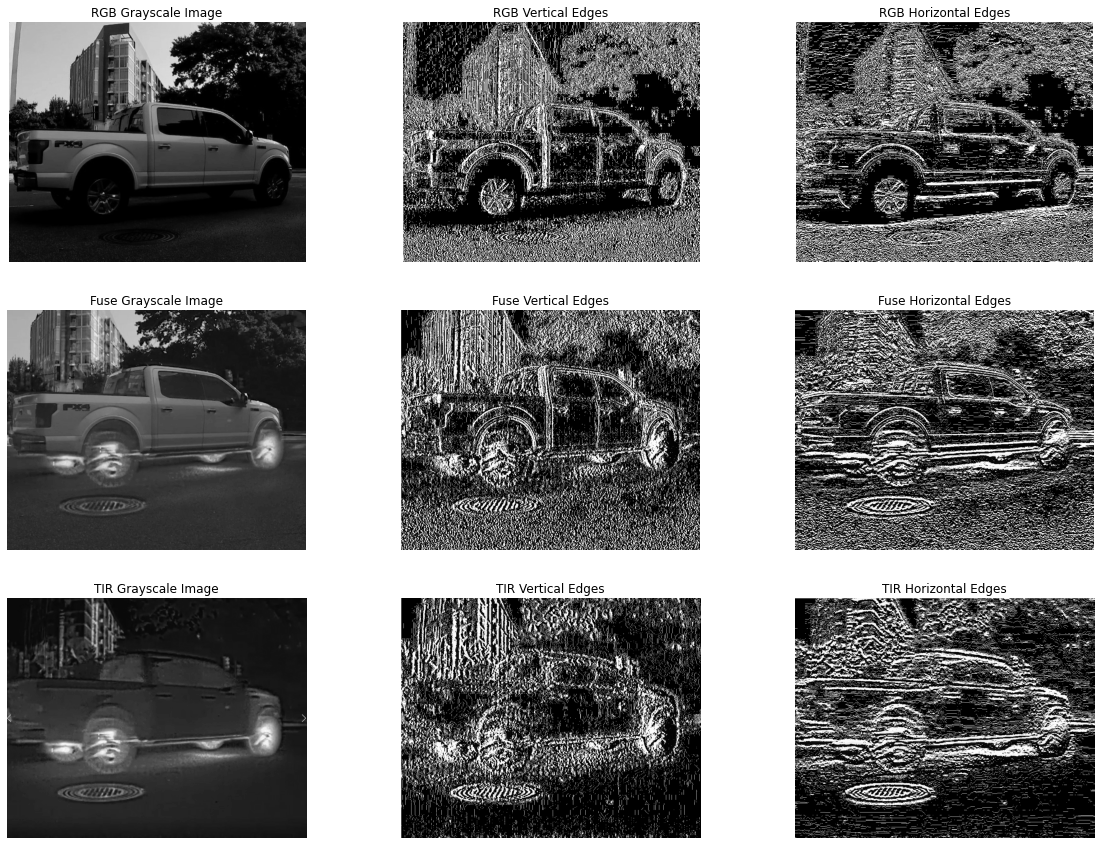

In [ ]:
#Edge Example

fig = plt.figure(figsize=(20, 15))
  
# setting values to rows and column variables
rows = 3
columns = 3

#RGB
amg = imageio.imread(img1, as_gray=True).astype(np.uint8)

fig.add_subplot(rows, columns, 1)
plt.title('RGB Grayscale Image')
plt.imshow(amg, cmap='gray')
plt.axis('off')


bmg = abs(amg - nd.shift(amg,(0,1),order=0))
cmg = abs(amg - nd.shift(amg,(1,0),order=0))

fig.add_subplot(rows, columns, 2)
plt.title('RGB Vertical Edges')
plt.imshow(-bmg, cmap='gray')
plt.axis('off')


fig.add_subplot(rows, columns, 3)
plt.title('RGB Horizontal Edges')
plt.imshow(-cmg, cmap='gray')
plt.axis('off')

#Fuse
amg1 = imageio.imread(img2, as_gray=True).astype(np.uint8)

fig.add_subplot(rows, columns, 4)
plt.title('Fuse Grayscale Image')
plt.imshow(amg1, cmap='gray')
plt.axis('off')


bmg = abs(amg1 - nd.shift(amg1,(0,1),order=0))
cmg = abs(amg1 - nd.shift(amg1,(1,0),order=0))

fig.add_subplot(rows, columns, 5)
plt.title('Fuse Vertical Edges')
plt.imshow(-bmg, cmap='gray')
plt.axis('off')


fig.add_subplot(rows, columns, 6)
plt.title('Fuse Horizontal Edges')
plt.imshow(-cmg, cmap='gray')
plt.axis('off')

#TIR
amg2 = imageio.imread(img3, as_gray=True).astype(np.uint8)

fig.add_subplot(rows, columns, 7)
plt.title('TIR Grayscale Image')
plt.imshow(amg2, cmap='gray')
plt.axis('off')


bmg = abs(amg2 - nd.shift(amg2,(0,1),order=0))
cmg = abs(amg2 - nd.shift(amg2,(1,0),order=0))

fig.add_subplot(rows, columns, 8)
plt.title('TIR Vertical Edges')
plt.imshow(-bmg, cmap='gray')
plt.axis('off')


fig.add_subplot(rows, columns, 9)
plt.title('TIR Horizontal Edges')
plt.imshow(-cmg, cmap='gray')
plt.axis('off')

### 3.4 Difference of Gaussians (DoG) Filter

(-0.5, 948.5, 760.5, -0.5)

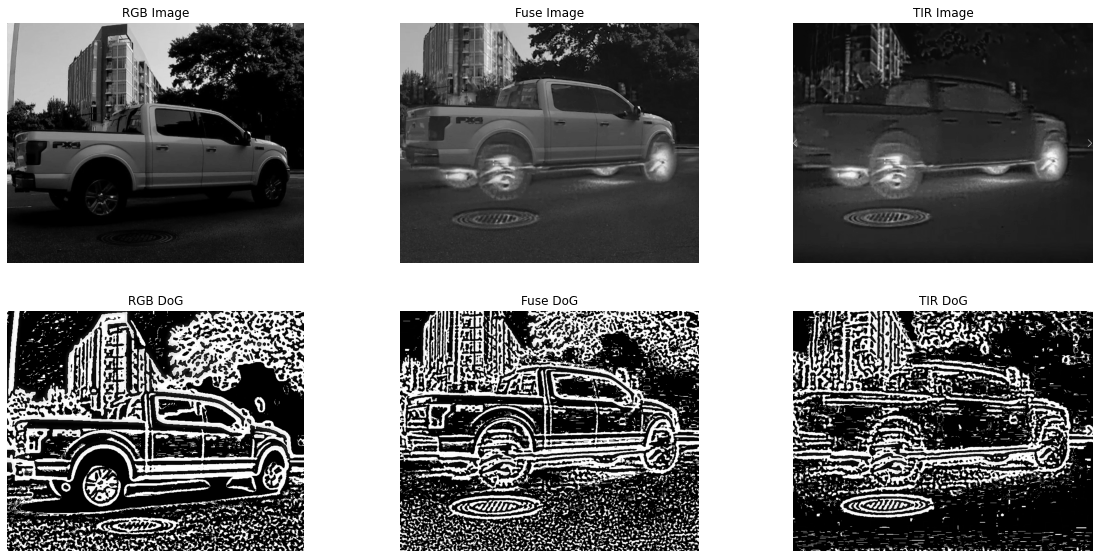

In [ ]:
# Difference of Gaussians (DoG) Filter

fig = plt.figure(figsize=(20, 15))
  
# setting values to rows and column variables
rows = 3
columns = 3

def DoGFilter(amg, sigma1, sigma2):
    b1 = nd.gaussian_filter(amg, sigma1)
    b2 = nd.gaussian_filter(amg, sigma2)
    answ = b1 - b2
    return answ

amg = imageio.imread(img1, as_gray=True).astype(np.uint8)

amg2 = imageio.imread(img2, as_gray=True).astype(np.uint8)

amg3 = imageio.imread(img3, as_gray=True).astype(np.uint8)

fig.add_subplot(rows, columns, 1)
plt.title('RGB Image')
plt.imshow(amg, cmap='gray')
plt.axis('off')


bmg = DoGFilter(amg, 2, 4)

fig.add_subplot(rows, columns, 4)
plt.title('RGB DoG')
plt.imshow(bmg, cmap='gray')
plt.axis('off')

fig.add_subplot(rows, columns, 2)
plt.title('Fuse Image')
plt.imshow(amg2, cmap='gray')
plt.axis('off')


cmg = DoGFilter(amg2, 2, 4)

fig.add_subplot(rows, columns, 5)
plt.title('Fuse DoG')
plt.imshow(cmg, cmap='gray')
plt.axis('off')

fig.add_subplot(rows, columns, 3)
plt.title('TIR Image')
plt.imshow(amg3, cmap='gray')
plt.axis('off')


dmg = DoGFilter(amg3, 2, 4)

fig.add_subplot(rows, columns, 6)
plt.title('TIR DoG')
plt.imshow(dmg, cmap='gray')
plt.axis('off')

### 3.5 Fractional Power Filter

In [ ]:
#  Fractional Power Filter Code Part1. DO NOT EDIT THIS.

def FPF(data, c, fp):
    # data is the incoming data... in rows : It is converted to columns here c is the constraint vector
    (N,Dim)= data.shape
    #X = transpose( data )# put vectors into columns

    # Compute D.  Best done in rows
    D = (np.power(abs(data), fp)).sum(0)
    D = D / N
    
    # it is possible that some values of D are 0 which will bomb out later
    ndx = (abs(D) < 0.001).nonzero()[0]
    D[ndx] = 0.001 * np.sign(D[ndx]+1e9)

    # Y is the modified X.  Also more efficient to compute from original data
    Y = data / np.sqrt(D)
    Y = Y.transpose()
    
    # compute Q
    Yc = Y.conjugate().transpose()
    Q = Yc.dot(Y)  # inner product
    
    if N == 1:  # only 1 training vector
        Q = 1./Q
    else:
        Q = np.linalg.inv(Q)
    
    Rc = Q.dot(c)
    H = Y.dot(Rc) / np.sqrt(D)
    # to test:  sum(conjugate(H[:,0]) * data[:,any] should equal c[any]
    return H



2.0164919839856652e-14
3.764452160105456e-14
4.08486706904257e-14


(-0.5, 948.5, 760.5, -0.5)

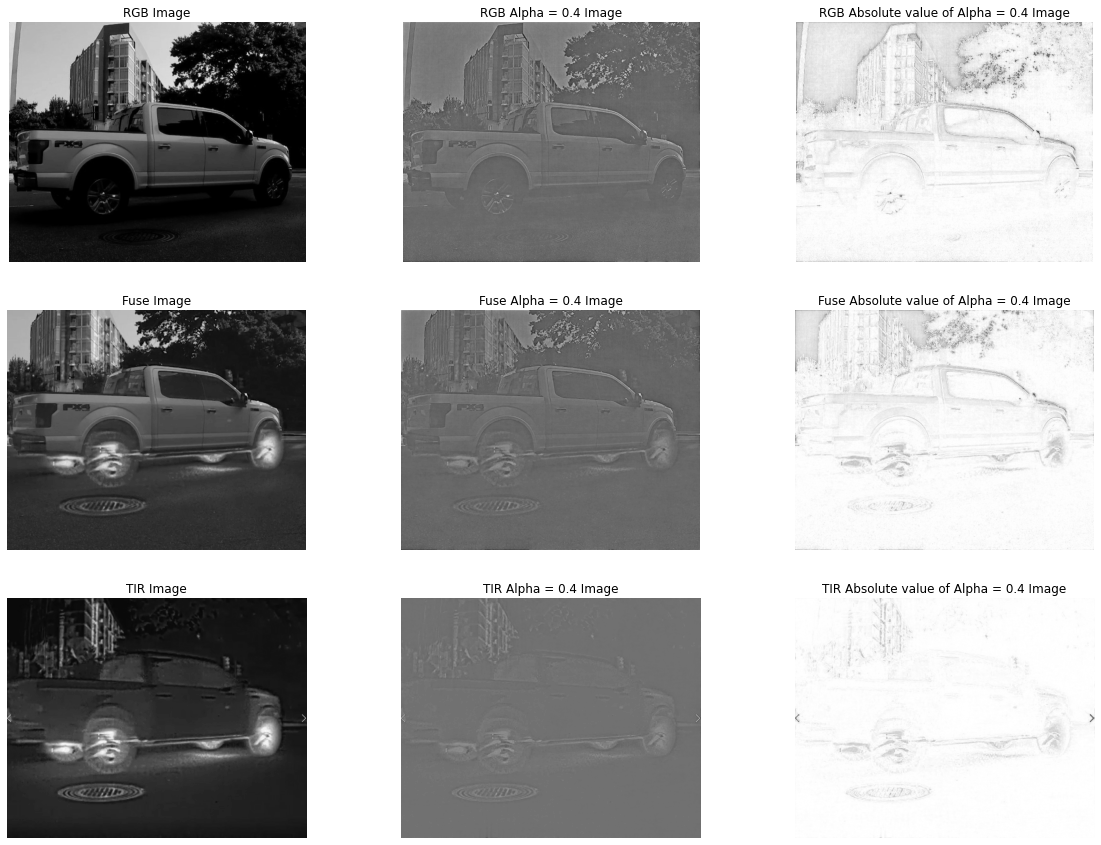

In [ ]:
#  Fractional Power Filter Part 2

fig = plt.figure(figsize=(20, 15))
  
# setting values to rows and column variables
rows = 3
columns = 3

#RGB
cdata = imageio.imread(img1, as_gray=True).astype(np.uint8)

fig.add_subplot(rows, columns, 1)
plt.title('RGB Image')
plt.imshow(cdata, cmap='gray')
plt.axis('off')


V,H =  cdata.shape
Xt = np.zeros((1,V*H), complex)
Xt[0] = ft.fft2(cdata).ravel()
cst = np.ones(1)

alpha = 0.4
ffilt = FPF(Xt, cst, alpha)
filt = ft.ifft2(ffilt.reshape(V,H))

fig.add_subplot(rows, columns, 2)
plt.title('RGB Alpha = 0.4 Image')
plt.imshow(filt.real, cmap='gray')
plt.axis('off')


alpha = 0.4
ffilt = FPF(Xt, cst, alpha)
filt = abs(ft.ifft2(ffilt.reshape(V,H)))

fig.add_subplot(rows, columns, 3)
print(filt.real[400,400])
plt.title('RGB Absolute value of Alpha = 0.4 Image')
plt.imshow(-filt.real, cmap='gray')
plt.axis('off')


# Fuse
bdata = imageio.imread(img2, as_gray=True).astype(np.uint8)

fig.add_subplot(rows, columns, 4)
plt.title('Fuse Image')
plt.imshow(bdata, cmap='gray')
plt.axis('off')


V,H =  bdata.shape
Xt = np.zeros((1,V*H), complex)
Xt[0] = ft.fft2(bdata).ravel()
cst = np.ones(1)

alpha = 0.4
ffilt = FPF(Xt, cst, alpha)
filt = ft.ifft2(ffilt.reshape(V,H))

fig.add_subplot(rows, columns, 5)
plt.title('Fuse Alpha = 0.4 Image')
plt.imshow(filt.real, cmap='gray')
plt.axis('off')


alpha = 0.4
ffilt = FPF(Xt, cst, alpha)
filt = abs(ft.ifft2(ffilt.reshape(V,H)))

fig.add_subplot(rows, columns, 6)
print(filt.real[400,400])
plt.title('Fuse Absolute value of Alpha = 0.4 Image')
plt.imshow(-filt.real, cmap='gray')
plt.axis('off')


# TIR
ddata = imageio.imread(img3, as_gray=True).astype(np.uint8)

fig.add_subplot(rows, columns, 7)
plt.title('TIR Image')
plt.imshow(ddata, cmap='gray')
plt.axis('off')


V,H =  ddata.shape
Xt = np.zeros((1,V*H), complex)
Xt[0] = ft.fft2(ddata).ravel()
cst = np.ones(1)

alpha = 0.4
ffilt = FPF(Xt, cst, alpha)
filt = ft.ifft2(ffilt.reshape(V,H))

fig.add_subplot(rows, columns, 8)
plt.title('TIR Alpha = 0.4 Image')
plt.imshow(filt.real, cmap='gray')
plt.axis('off')


alpha = 0.4
ffilt = FPF(Xt, cst, alpha)
filt = abs(ft.ifft2(ffilt.reshape(V,H)))

fig.add_subplot(rows, columns, 9)
print(filt.real[400,400])
plt.title('TIR Absolute value of Alpha = 0.4 Image')
plt.imshow(-filt.real, cmap='gray')
plt.axis('off')

### 3.6 Mean Threshold and Gaussian Threshold

(-0.5, 948.5, 760.5, -0.5)

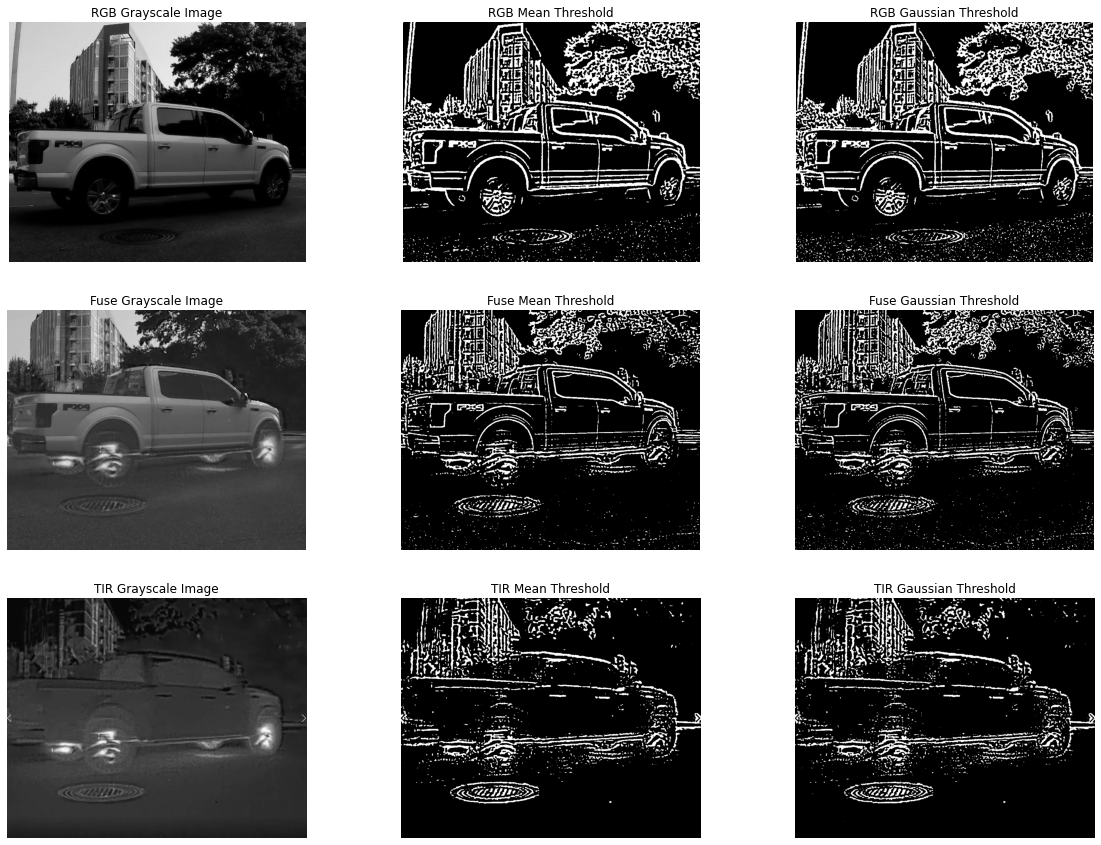

In [ ]:
#Mean Threshold and Gaussian Threshold

fig = plt.figure(figsize=(20, 15))
  
# setting values to rows and column variables
rows = 3
columns = 3

#RGB 
fig.add_subplot(rows, columns, 1)
image = imageio.imread(img1)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(image, (5, 5), 0)
plt.title('RGB Grayscale Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

fig.add_subplot(rows, columns, 2)
thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 4)
plt.title('RGB Mean Threshold')
plt.imshow(thresh, cmap='gray')
plt.axis('off')

fig.add_subplot(rows, columns, 3)
thresh = cv2.adaptiveThreshold(blurred, 255,
cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 15, 3)
plt.title('RGB Gaussian Threshold')
plt.imshow(thresh, cmap='gray')
plt.axis('off')

#Fuse
fig.add_subplot(rows, columns, 4)
image = imageio.imread(img2)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(image, (5, 5), 0)
plt.title('Fuse Grayscale Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

fig.add_subplot(rows, columns, 5)
thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 4)
plt.title('Fuse Mean Threshold')
plt.imshow(thresh, cmap='gray')
plt.axis('off')

fig.add_subplot(rows, columns, 6)
thresh = cv2.adaptiveThreshold(blurred, 255,
cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 15, 3)
plt.title('Fuse Gaussian Threshold')
plt.imshow(thresh, cmap='gray')
plt.axis('off')

#TIR
fig.add_subplot(rows, columns, 7)
image = imageio.imread(img3)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(image, (5, 5), 0)
plt.title('TIR Grayscale Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

fig.add_subplot(rows, columns, 8)
thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 4)
plt.title('TIR Mean Threshold')
plt.imshow(thresh, cmap='gray')
plt.axis('off')

fig.add_subplot(rows, columns, 9)
thresh = cv2.adaptiveThreshold(blurred, 255,
cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 15, 3)
plt.title('TIR Gaussian Threshold')
plt.imshow(thresh, cmap='gray')
plt.axis('off')

### 4 Image Processing Comparison Matrix

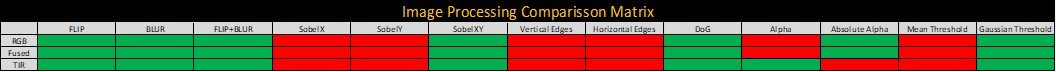

In [ ]:
from IPython.display import Image
Image('image compare.jpg')